<a href="https://www.kaggle.com/code/kbdharun/imdb-dataset-nbc-short-program?scriptVersionId=164522645" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Naive Bayes Classifier on IMDB Movies Review Dataset

Credits. **Harinarayan**

## I. Importing Packages


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt

## II. Reading Dataset

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Load the dataset using read_csv
df = pd.read_csv(r'/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## III. Exploring the Dataset

In [3]:
# Display the first few rows of the dataset
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## IV. Preprocess the dataset

In [4]:
# Preprocessing function: tokenization, stopword removal, stemming, and removing special characters and <br>
def preprocess_text(text):
    # Remove special characters and <br>
    text = re.sub(r'<br />', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return " ".join(stemmed_tokens)

In [5]:
# Apply preprocessing to the 'review' column
df['review'] = df['review'].apply(preprocess_text)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['sentiment'], test_size=0.2, random_state=42)
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
# Predictions
predictions = classifier.predict(X_test_vect)

## V. Plot Confusion Matrix, Histograms and check classification report

In [7]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4312  649]
 [ 806 4233]]


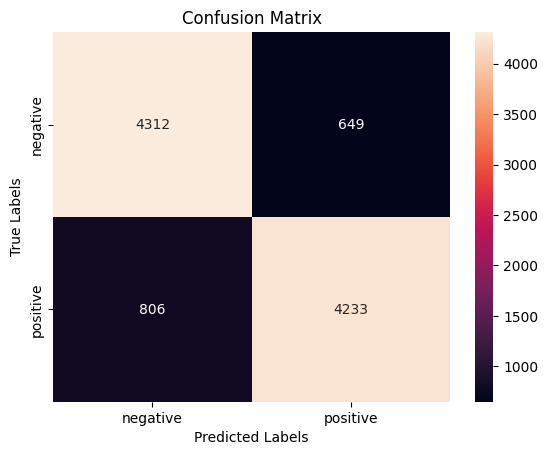

In [8]:
import seaborn as sns
# Display confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classifier.classes_,yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      4961
    positive       0.87      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [10]:
df['review_length'] = df['review'].apply(len)


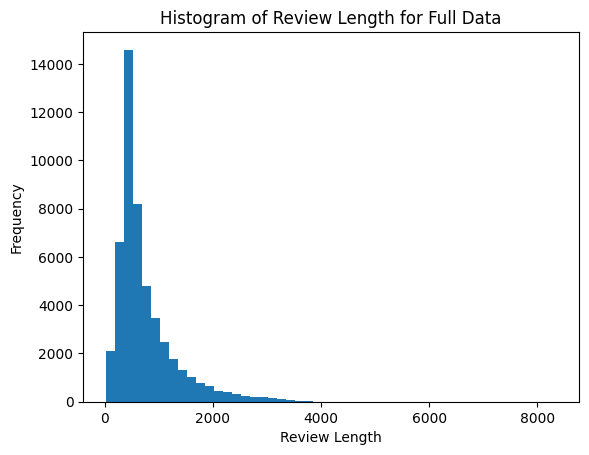

In [11]:
plt.hist(df['review_length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Length for Full Data')
plt.show()

In [12]:
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

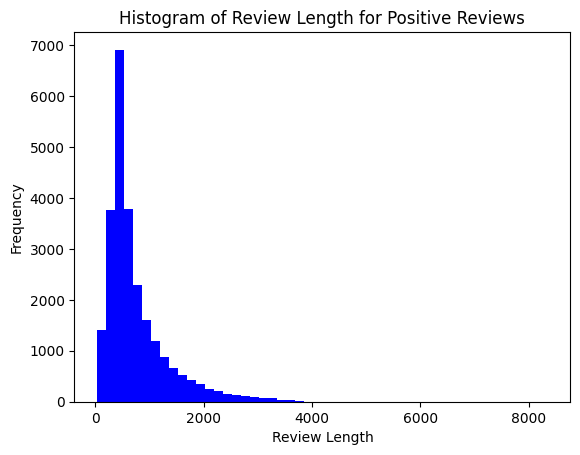

In [13]:
plt.hist(positive_reviews['review_length'], bins=50, color='blue')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Length for Positive Reviews')
plt.show()

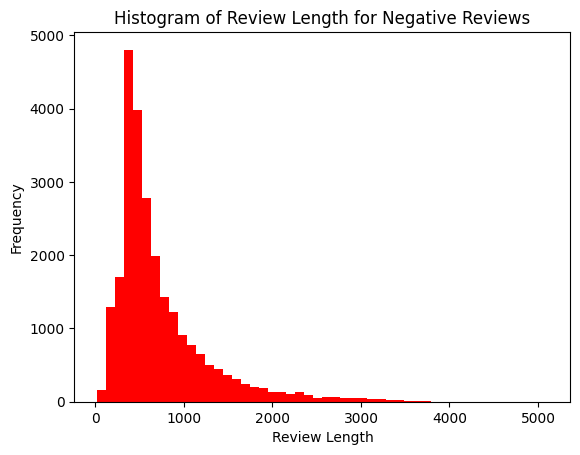

In [14]:
plt.hist(negative_reviews['review_length'], bins=50, color='red')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Length for Negative Reviews')
plt.show()

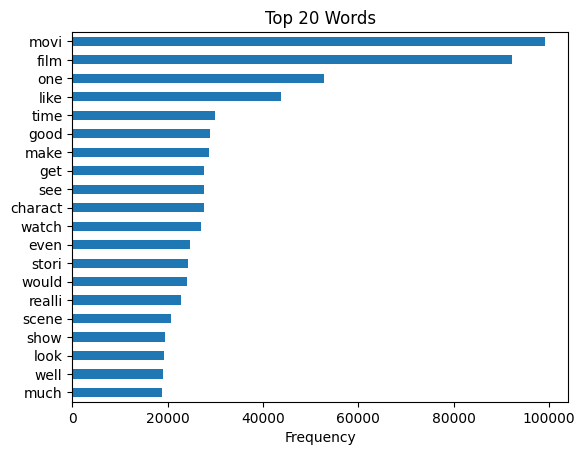

In [15]:
from collections import Counter
words = nltk.word_tokenize(" ".join(df['review'].values.tolist()))
word_freq = Counter(words)

words_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])
top_words = words_df.sort_values(by='Frequency', ascending=False).head(20)

top_words.plot(kind='barh', legend=False)
plt.xlabel('Frequency')
plt.title('Top 20 Words')
plt.gca().invert_yaxis()
plt.show()